# **1. Preparing the libraries**

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install graphviz
!pip install jupyter
!pip install openpyxl
!pip install pydot pydotplus


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **2. Preparing the datasets**

## **2.1. Get data from file**

In [2]:

# Lấy dữ liệu từ file processed.cleveland.data
import pandas as pd

column_names = [
    "age",         # tuổi
    "sex",         # giới tính (1 = nam, 0 = nữ)
    "cp",          # loại đau ngực
    "trestbps",    # huyết áp khi nghỉ
    "chol",        # cholesterol
    "fbs",         # đường huyết lúc đói > 120 mg/dl (1/0)
    "restecg",     # kết quả ECG lúc nghỉ
    "thalach",     # nhịp tim tối đa đạt được
    "exang",       # đau thắt ngực do gắng sức (1/0)
    "oldpeak",     # ST chênh so với nghỉ
    "slope",       # độ dốc đoạn ST
    "ca",          # số lượng mạch chính được nhuộm màu (0–3)
    "thal",        # kết quả thallium test (3 = bình thường, 6 = lỗi cố định, 7 = lỗi có thể phục hồi)
    "target"       # nhãn kết quả (0 = không bệnh, 1-4 = có bệnh)
]

# URL to the processed Cleveland dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

df = pd.read_csv(url, names=column_names, na_values='?')
# target > 0 thành 1 vì chỉ phân biệt có bệnh hay không
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# điền dữ liệu bị thiếu 
df["ca"] = df["ca"].fillna(df["ca"].median())
df["thal"] = df["thal"].fillna(df["thal"].mode()[0])

print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6

## **2.2. Splitting the datasets**

In [3]:
# drop bỏ cái cột target
X = df.drop("target", axis=1)
# bảng mỗi cột target
y = df["target"]

from sklearn.model_selection import train_test_split

split_ratios = [0.4, 0.6, 0.8, 0.9]
datasets = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=1-ratio,
        stratify=y,
        random_state=42,
        shuffle=True
    )
    # lưu dữ liệu vào data set
    # ví dụ  0.4_0.6 là tỉ lệ 40% train và 60% test
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    # cộng với 0.001 để tránh làm tròn xuống =))
    datasets[f"feature_train_{key}"] = X_train
    datasets[f"label_train_{key}"] = y_train
    datasets[f"feature_test_{key}"] = X_test
    datasets[f"label_test_{key}"] = y_test
    
print("Length of subsets is 16:", len(datasets) == 16)

Length of subsets is 16: True


## **2.3. Visualize the dataset**

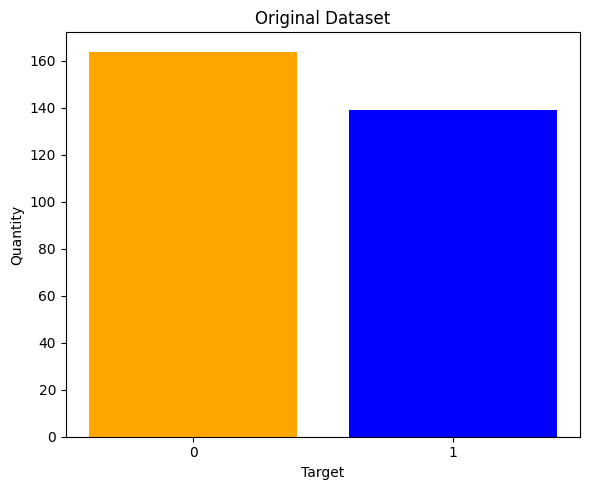

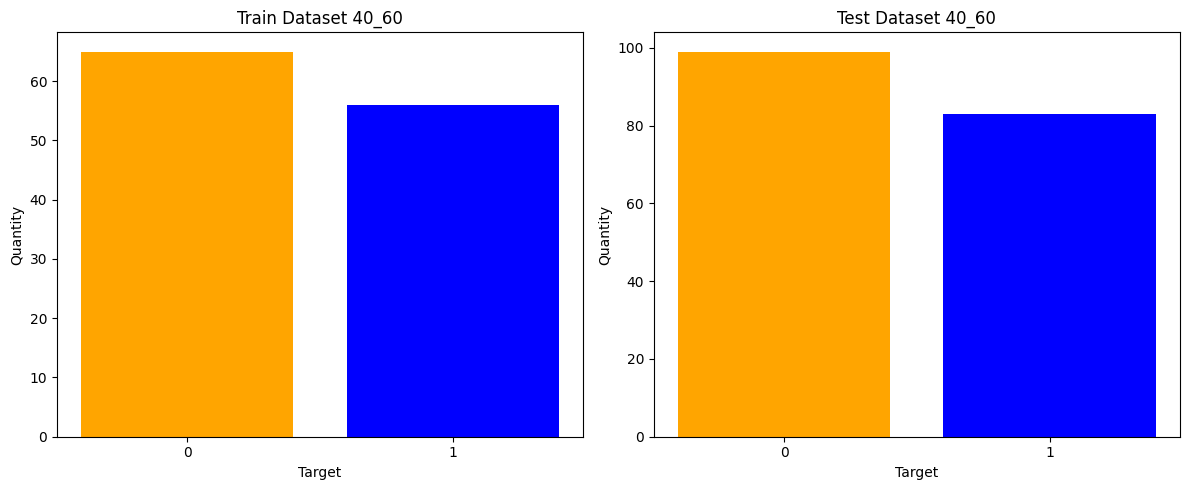

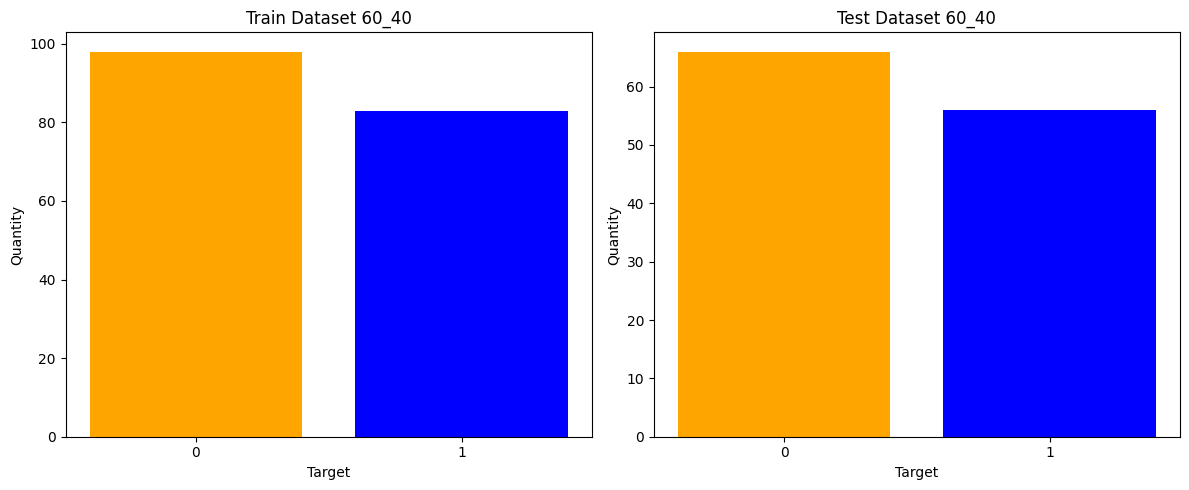

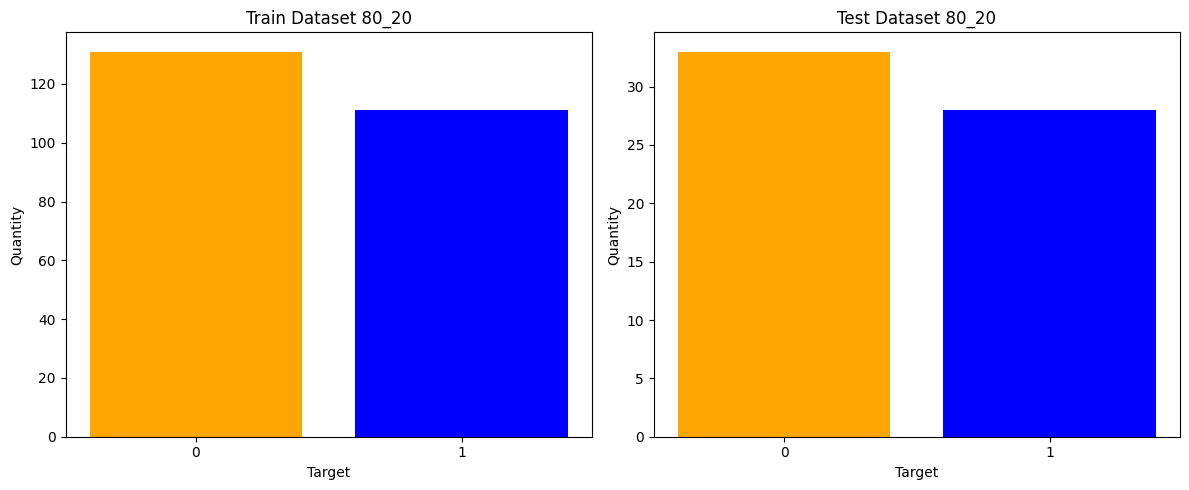

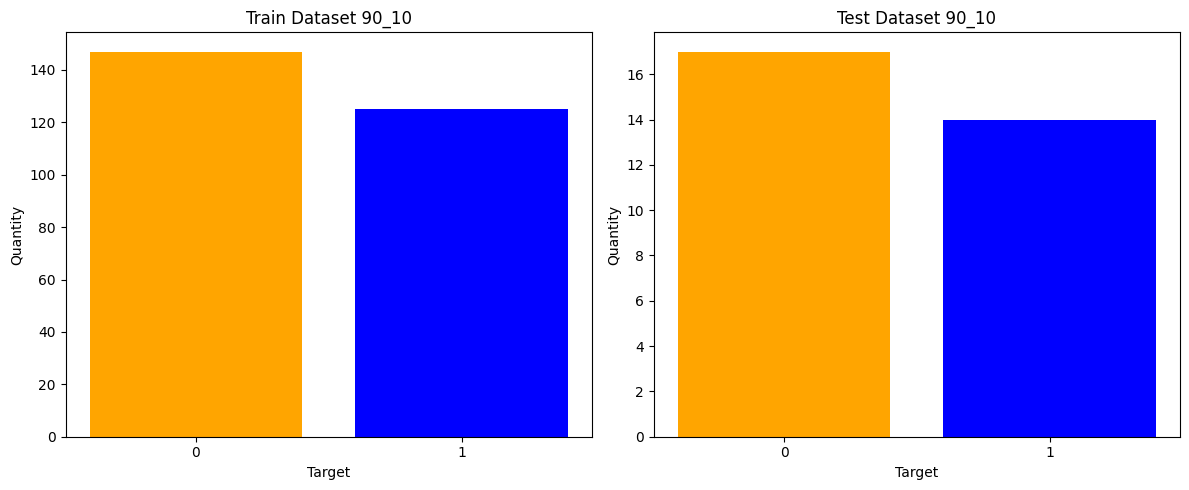

In [5]:
import matplotlib.pyplot as plt

def plot_distribution(y_train, y_test, title_train, title_test):
    
    colors = ['orange', 'blue']

    if y_train.equals(y_test):
        # If y_train and y_test are identical, plot only one graph
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))

        counts = y_train.value_counts().sort_index()
        labels = counts.index
        values = counts.values

        ax.bar(labels, values, color = colors)
        ax.set_title(f"{title_train}")
        ax.set_xlabel("Target")
        ax.set_ylabel("Quantity")
        ax.set_xticks(labels)

    else:
        # Else, plot two side-by-side graphs
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot for the training set
        counts_train = y_train.value_counts().sort_index()
        labels_train = counts_train.index
        values_train = counts_train.values
        axes[0].bar(labels_train, values_train, color=colors)
        axes[0].set_title(title_train)
        axes[0].set_xlabel("Target")
        axes[0].set_ylabel("Quantity")
        axes[0].set_xticks(labels_train)

        # Plot for the test set
        counts_test = y_test.value_counts().sort_index()
        labels_test = counts_test.index
        values_test = counts_test.values
        axes[1].bar(labels_test, values_test, color=colors)
        axes[1].set_title(title_test)
        axes[1].set_xlabel("Target")
        axes[1].set_ylabel("Quantity")
        axes[1].set_xticks(labels_test)

    plt.tight_layout()
    plt.show()

# Visualize the full dataset (y vs y)
plot_distribution(y, y, "Original Dataset", "Original Dataset")

# Visualize each train/test split
for ratio in split_ratios:
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    plot_distribution(
        datasets[f"label_train_{key}"],
        datasets[f"label_test_{key}"],
        f"Train Dataset {key}",
        f"Test Dataset {key}"
    )


# **3. Building the decision trees classifiers based on proportions**

## **3.1. Get the decision trees based on proportions**

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Store the decision trees for each split
decision_trees = {}

# Loop through each train/test split
for ratio in split_ratios:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Get feature_train and label_train
    X_train = datasets[f"feature_train_{key}"]
    y_train = datasets[f"label_train_{key}"]

    # Create and train the Decision Tree
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    decision_trees[f"decision_tree_{key}"] = clf

print("There are 4 decision trees for 4 different ratios:", len(decision_trees) == 4)

There are 4 decision trees for 4 different ratios: True


## **3.2. Draw the decision trees based on proportions**

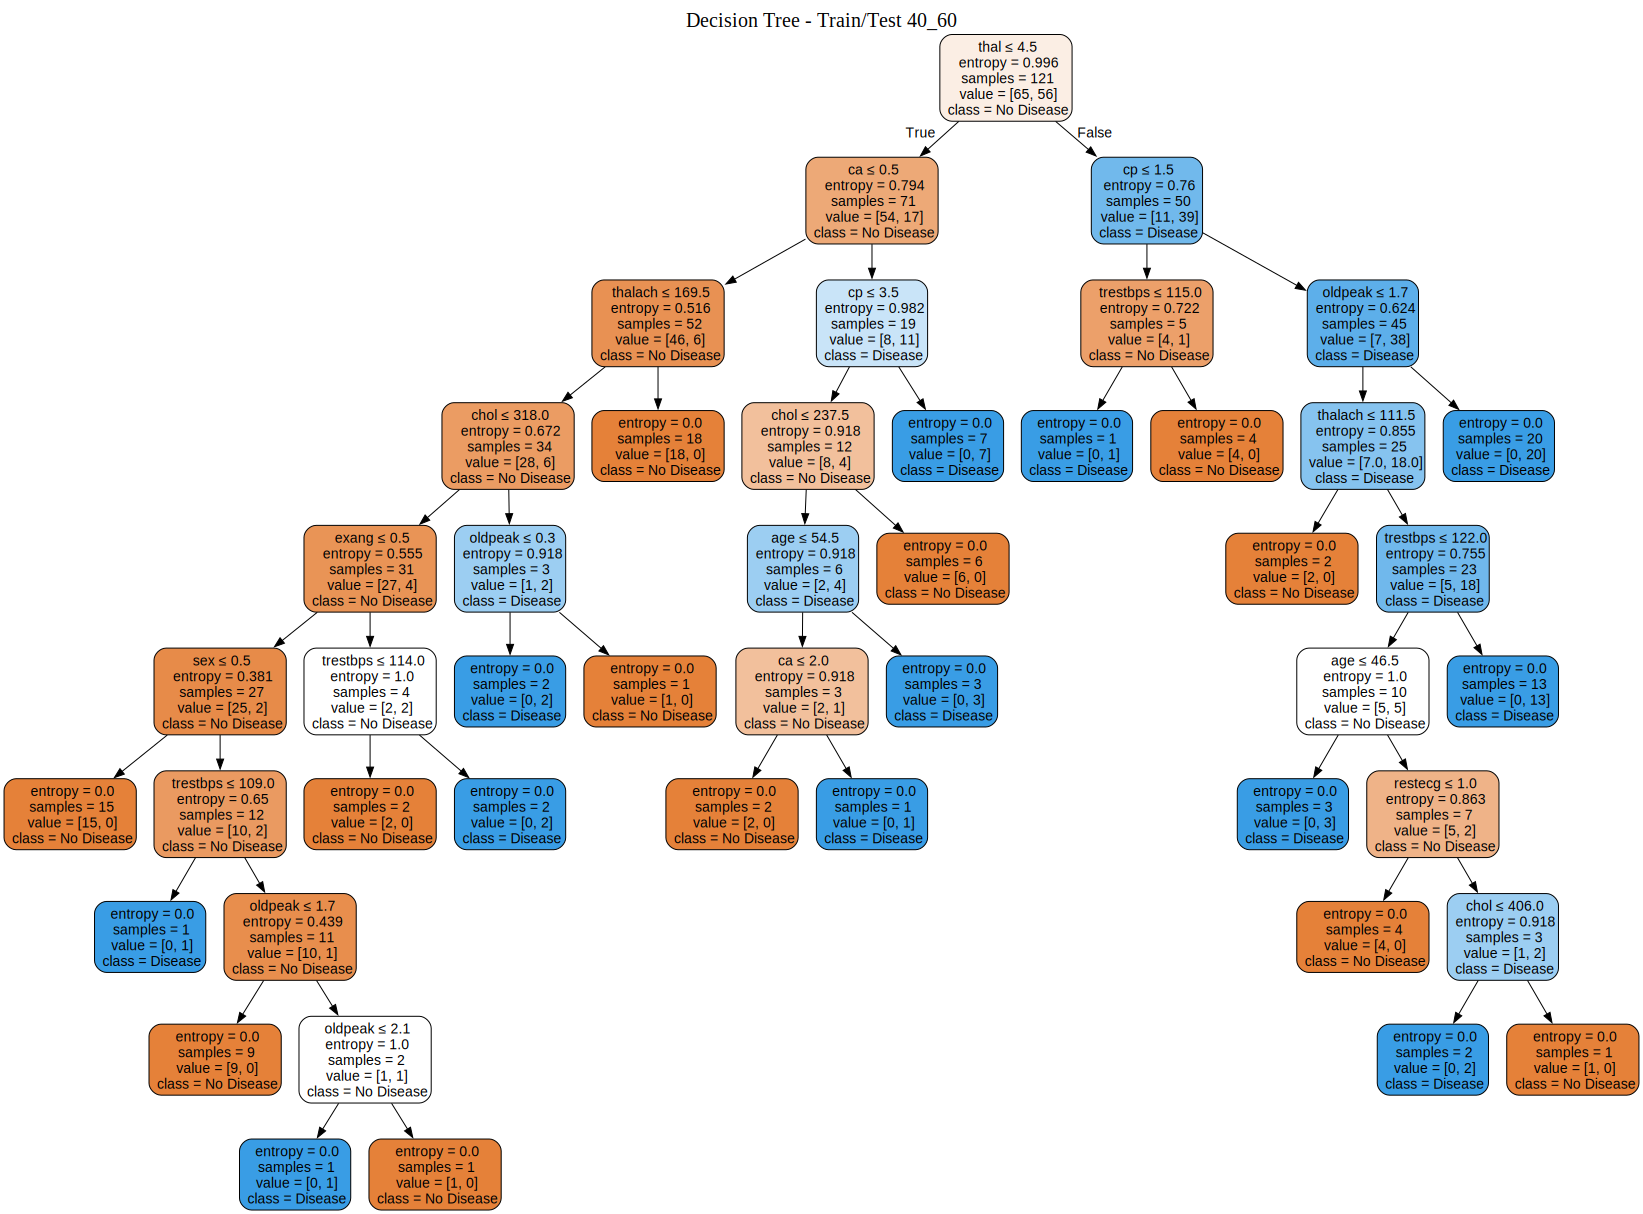

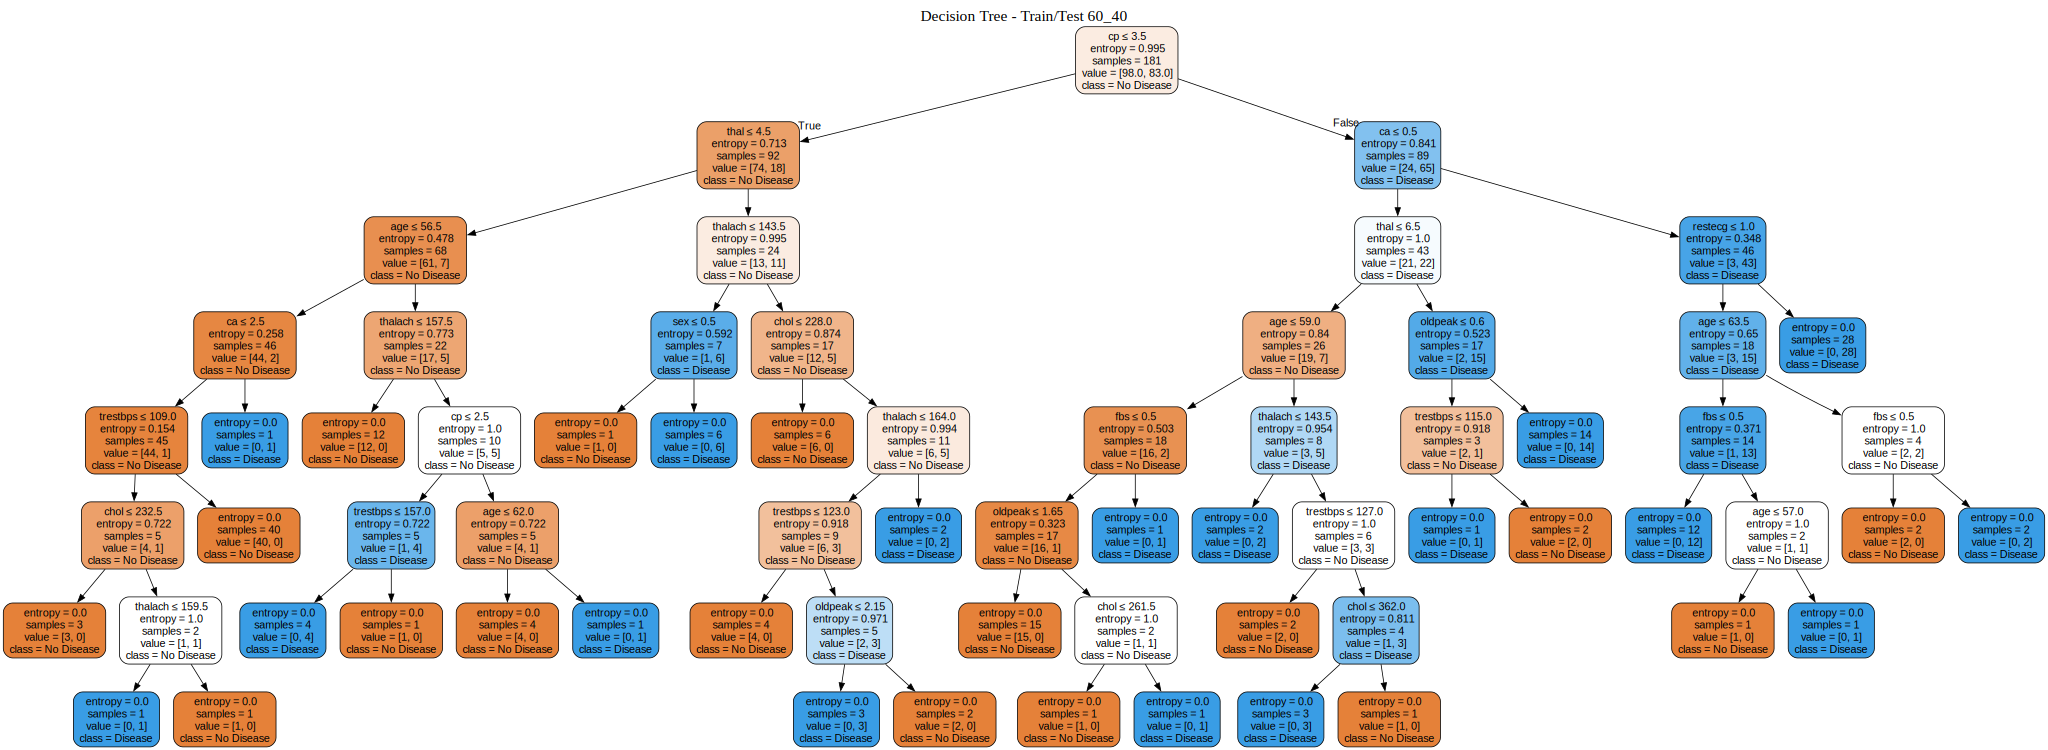

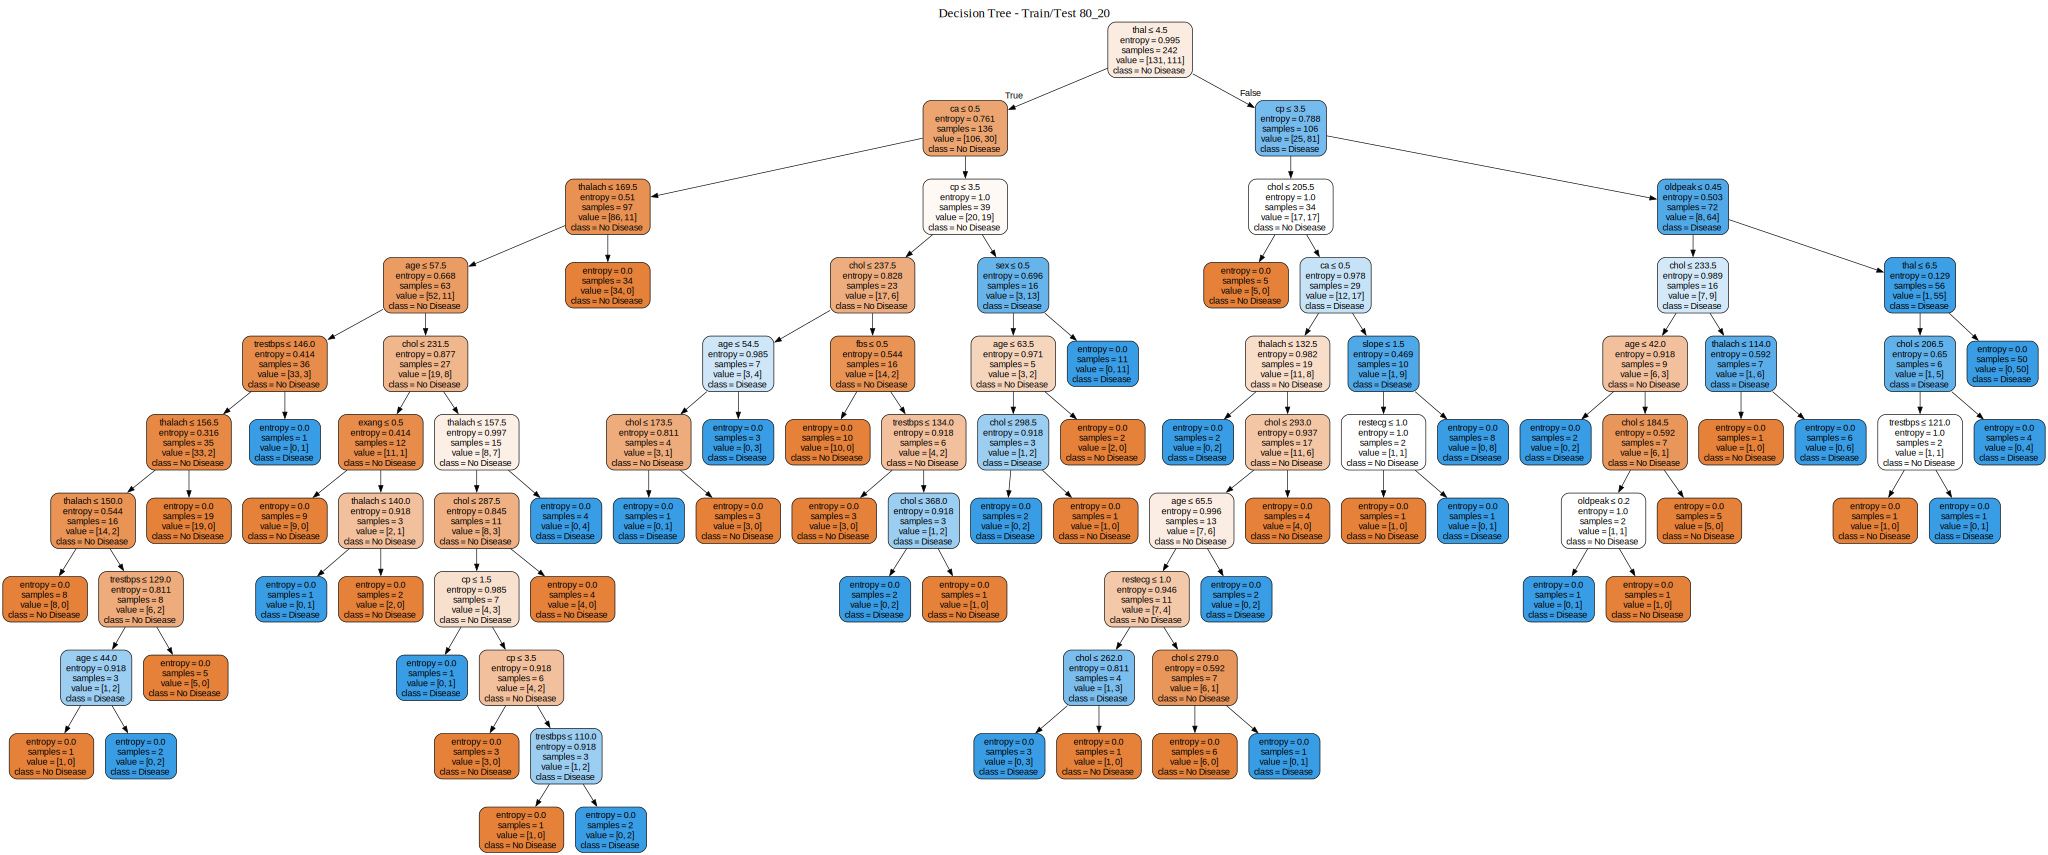

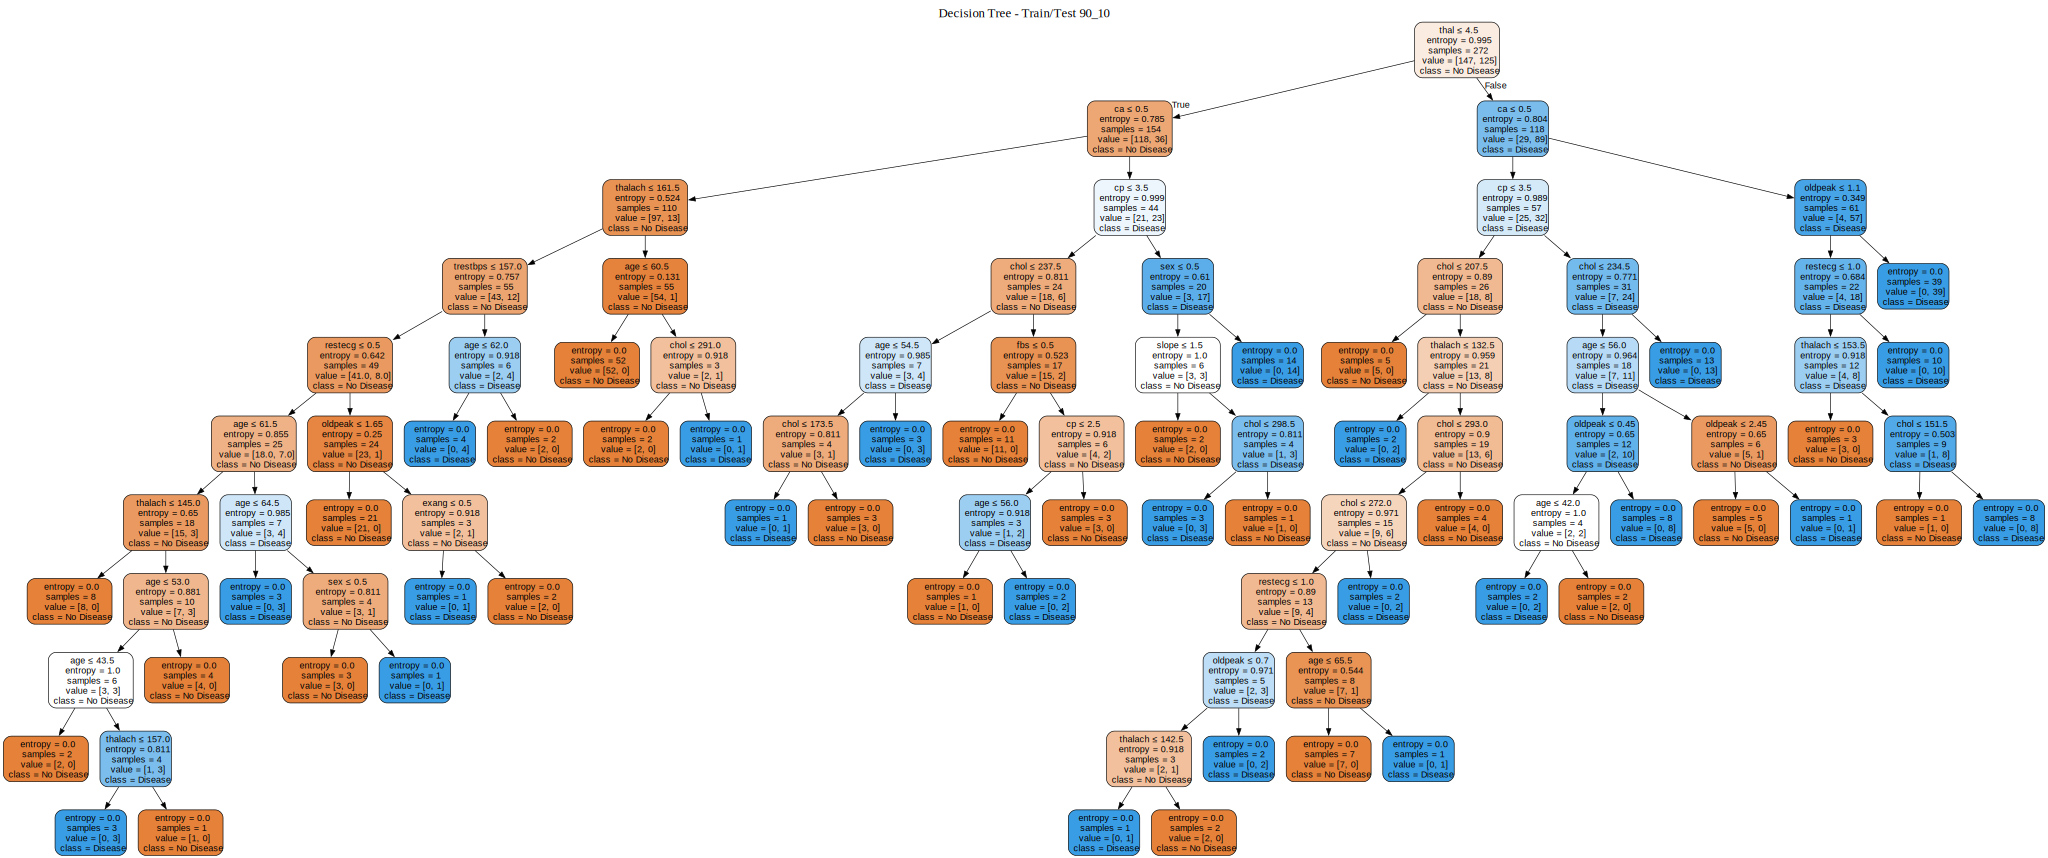

In [7]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

for ratio in split_ratios:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Get feature_train and label_train
    X_train = datasets[f"feature_train_{key}"]
    clf_train = decision_trees[f"decision_tree_{key}"]
    
    # Export the decision tree to DOT format, adding a name
    dot_data = export_graphviz(
        clf_train,  
        feature_names=X_train.columns, 
        class_names=["No Disease", "Disease"], 
        filled=True, 
        rounded=True,
        special_characters=True,
        out_file=None,
    )
    
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Train/Test {key}";\nlabelloc=top;\nfontsize=20;'
    )    
    # Render the decision tree using Graphviz
    
    graph = graphviz.Source(dot_data)
    display(graph)


## **4. Evaluating the decision tree classifiers**

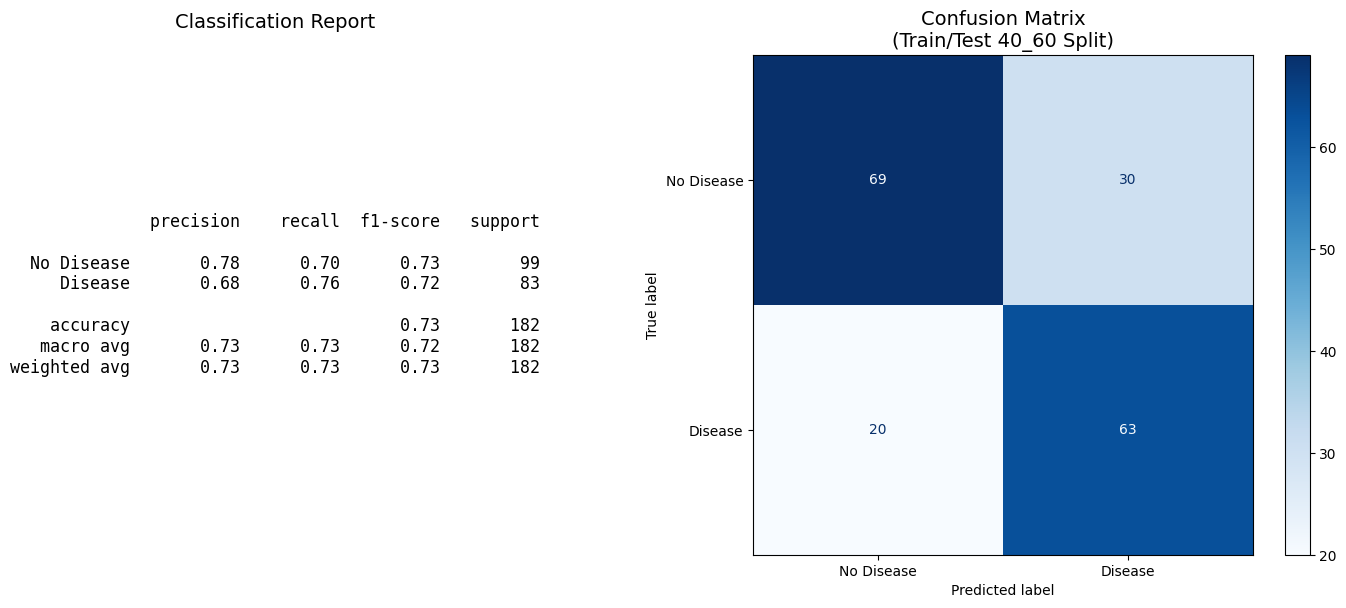

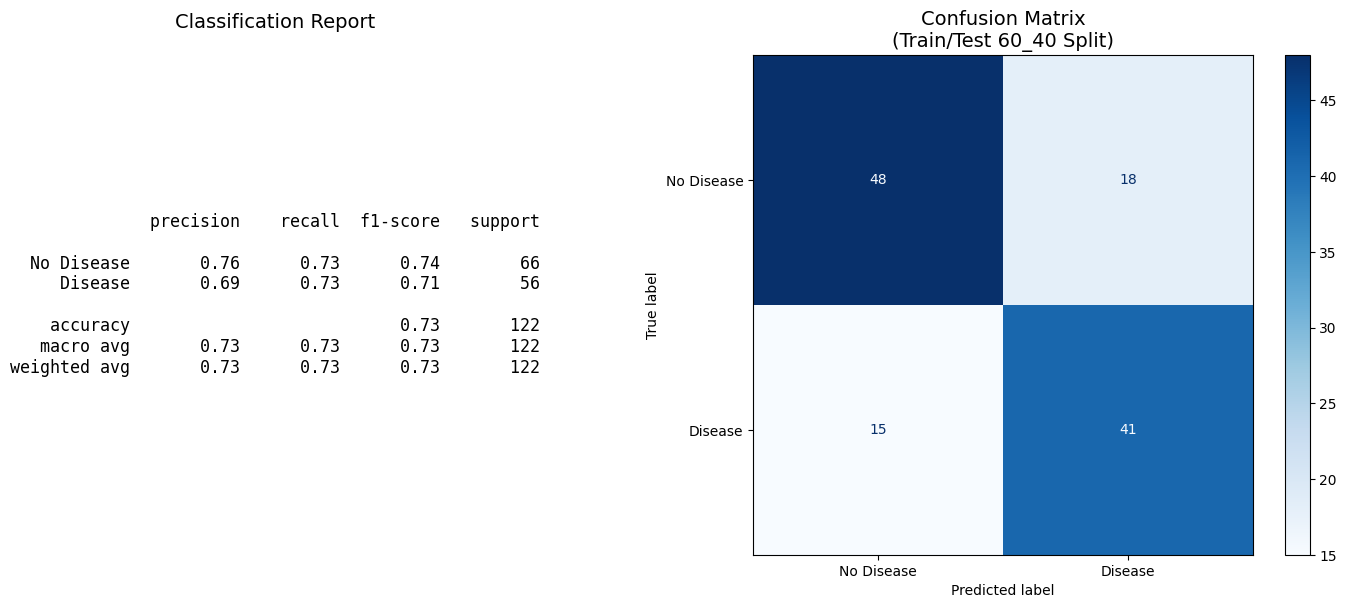

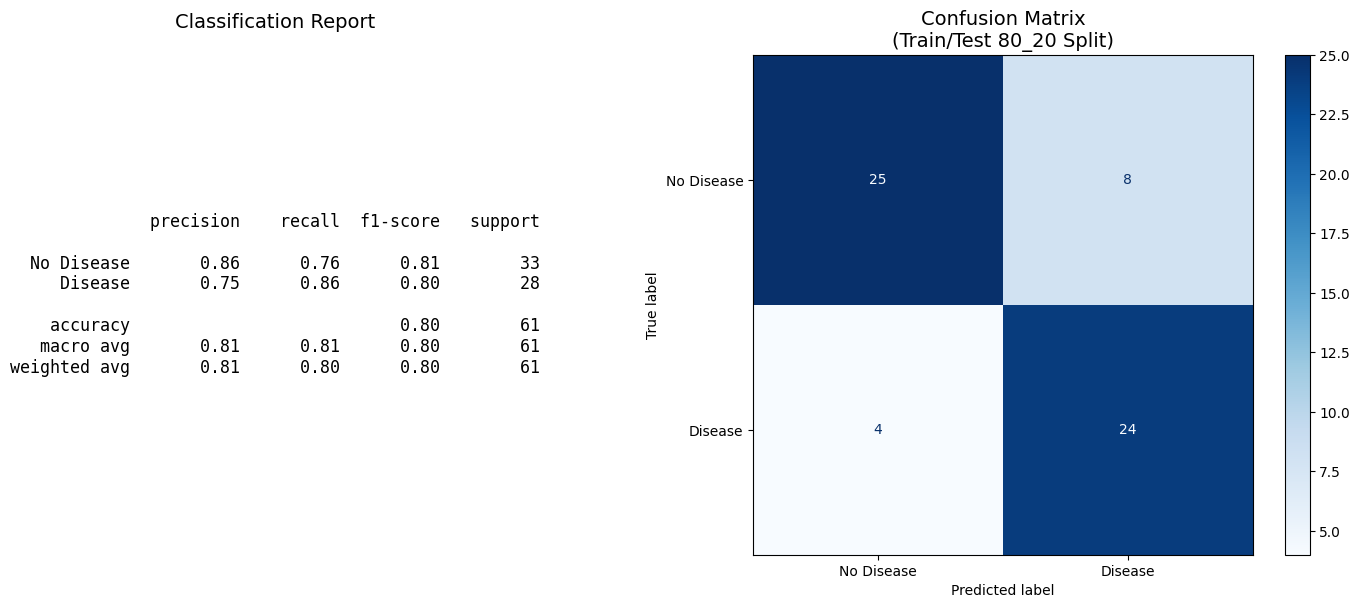

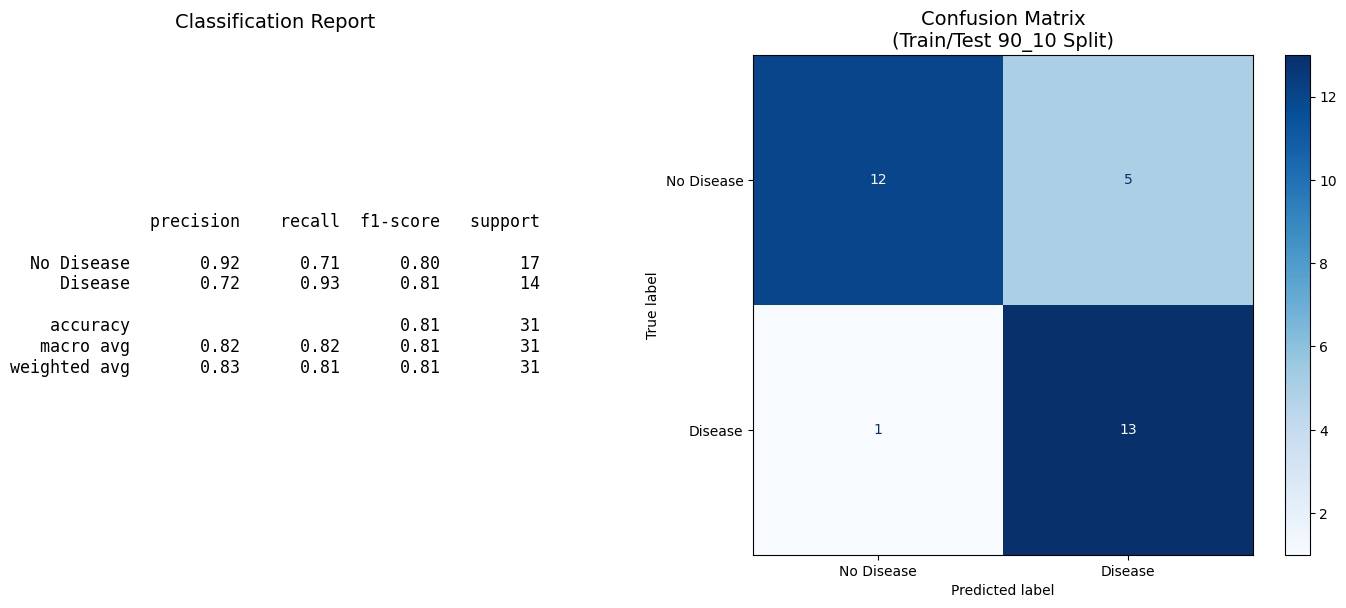

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for ratio in split_ratios:
    # Create key like 80_20
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Load test data
    X_test = datasets[f"feature_test_{key}"]
    y_test = datasets[f"label_test_{key}"]
    
    # Load trained classifier
    clf = decision_trees[f"decision_tree_{key}"]
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Classification report as text
    report_text = classification_report(y_test, y_pred, target_names=["No Disease", "Disease"])
    # print(f"\nClassification Report (Train/Test {key} Split):\n")
    # print(report_text)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot side-by-side: Classification Report (left) and Confusion Matrix (right)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.2]})
    
    # Plot classification report text on the left
    axes[0].axis('off')  # Turn off the axes
    axes[0].text(0, 0.5, report_text, fontsize=12, ha='left', va='center', wrap=True, family='monospace')
    axes[0].set_title("Classification Report", fontsize=14, pad=20)
    
    # Plot confusion matrix on the right
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
    disp.plot(cmap='Blues', ax=axes[1], colorbar=True)
    axes[1].set_title(f"Confusion Matrix\n(Train/Test {key} Split)", fontsize=14)
    
    plt.tight_layout()
    plt.show()


## **5. The depth and accuracy of a decision tree**

## **5.1. Draw the decision trees**

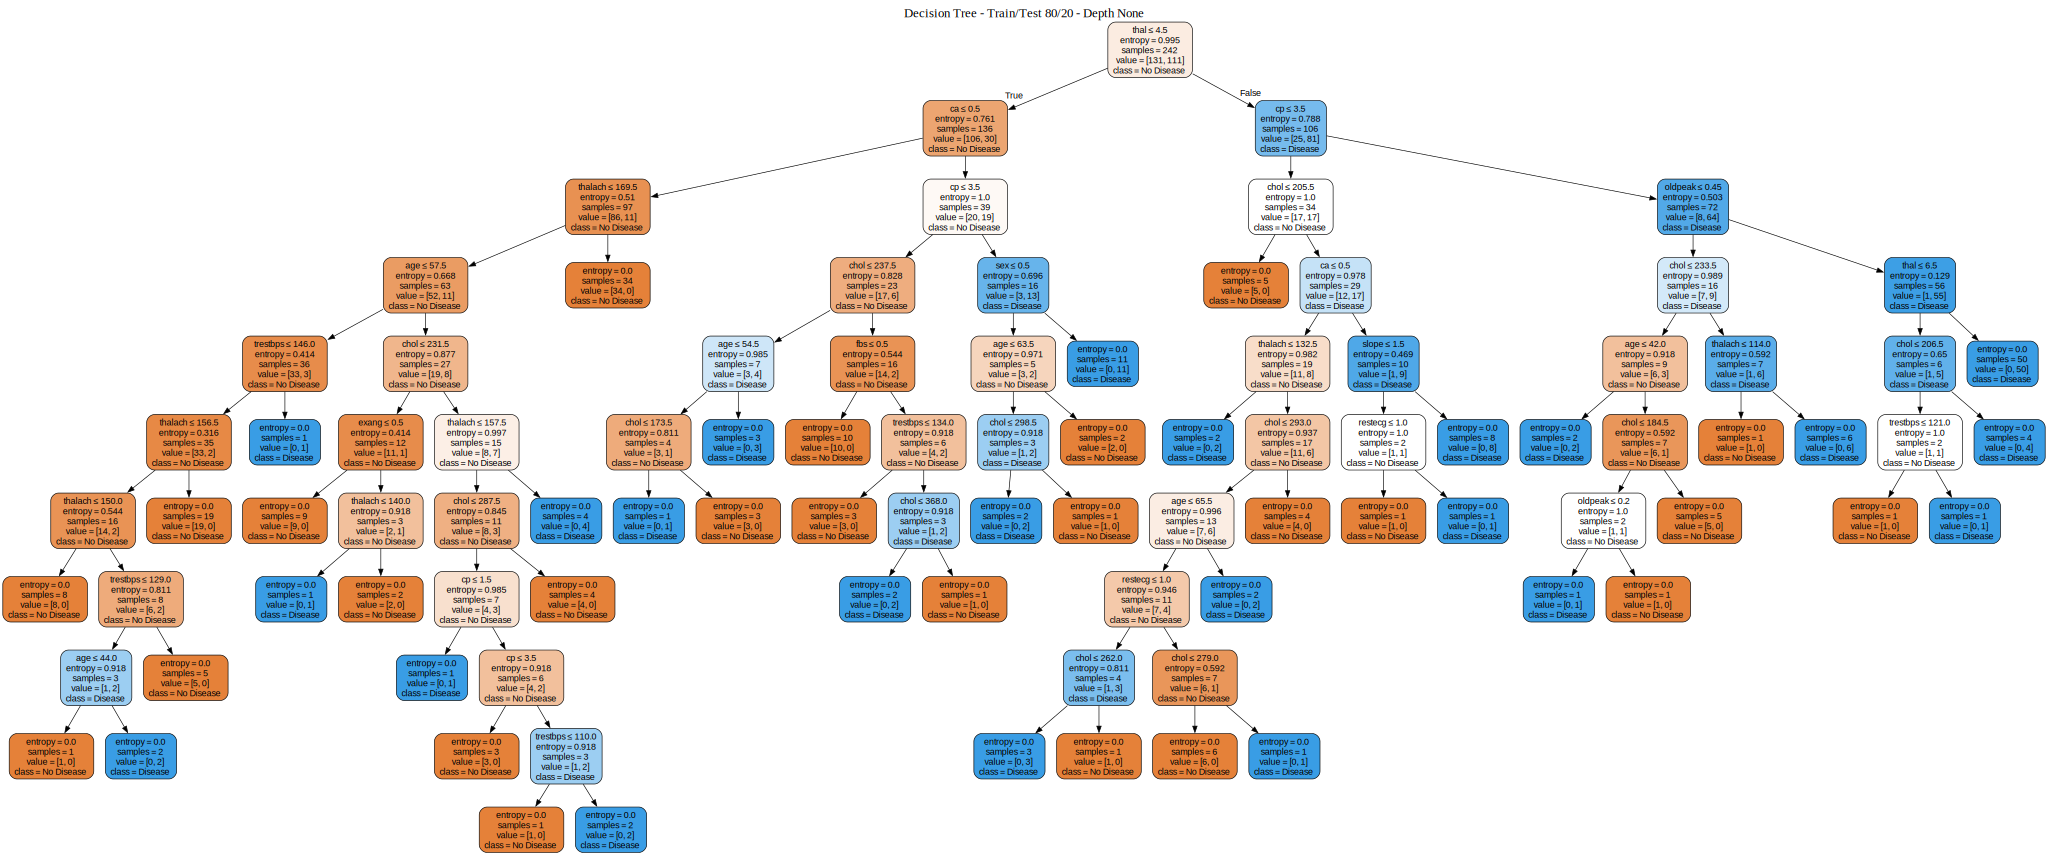

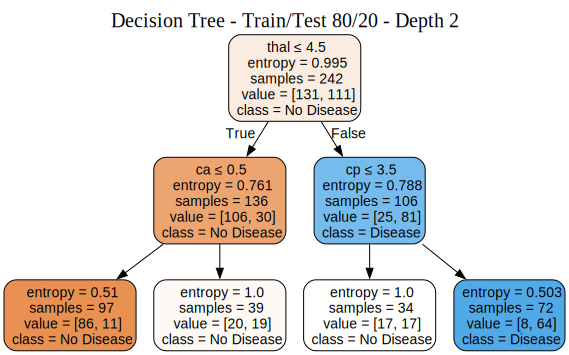

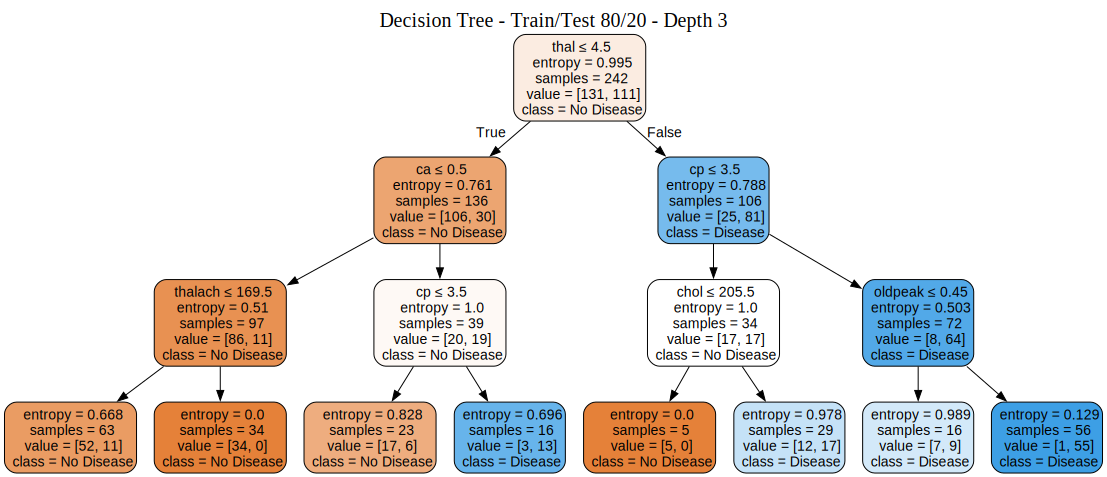

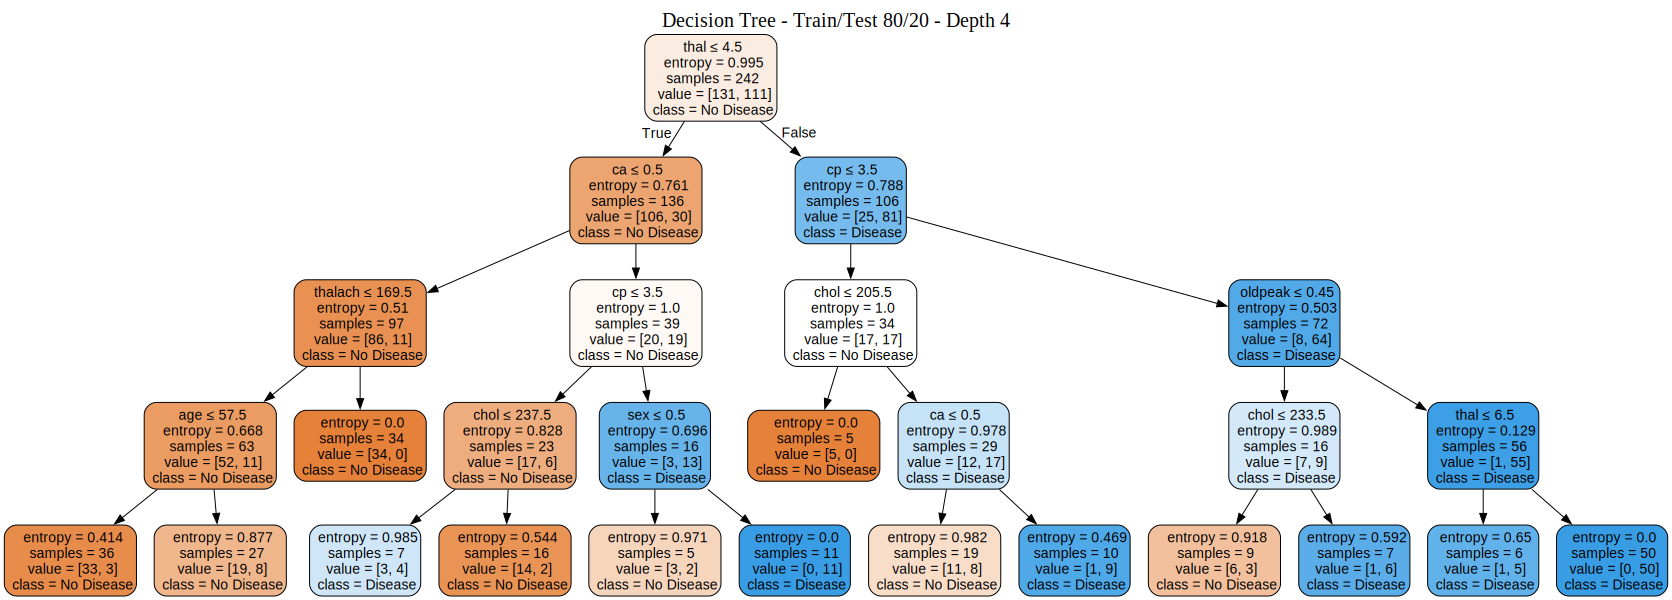

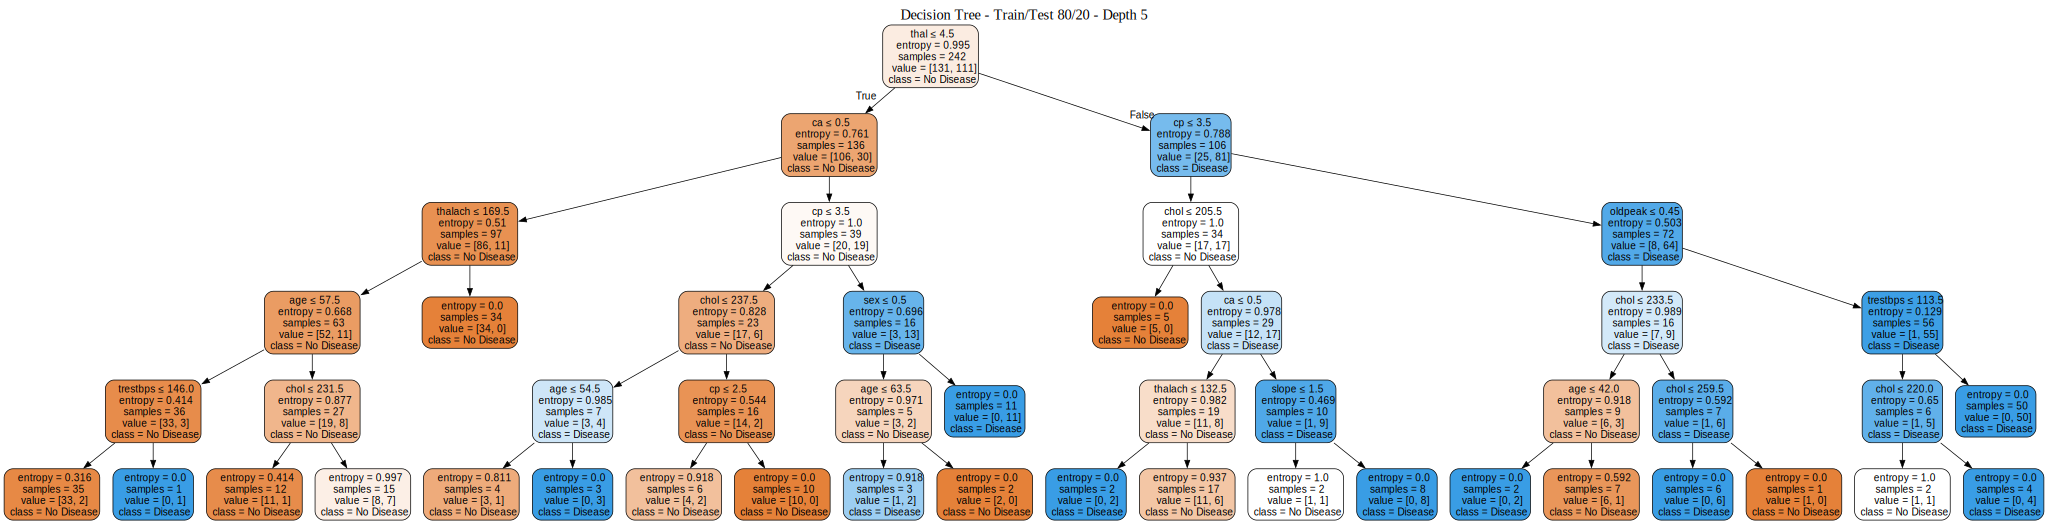

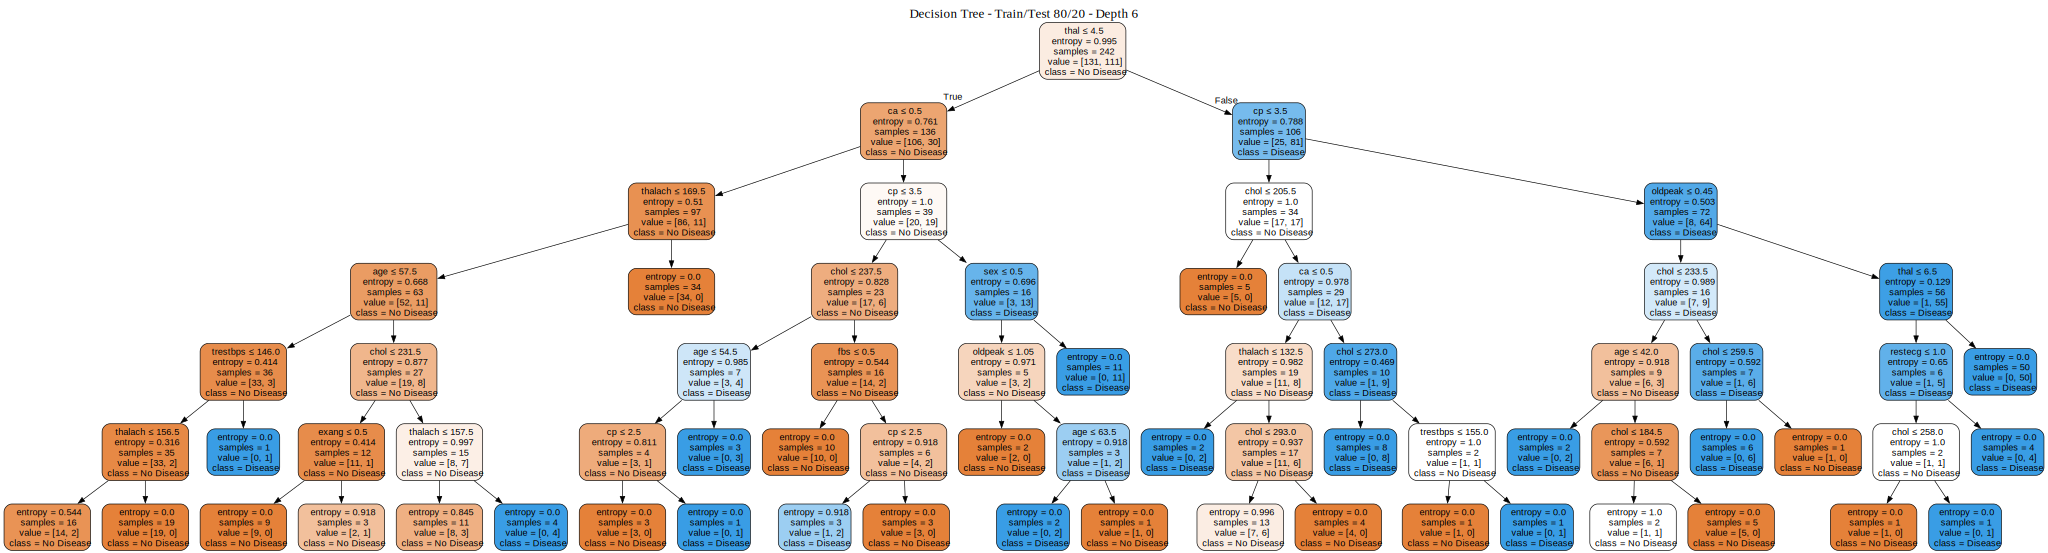

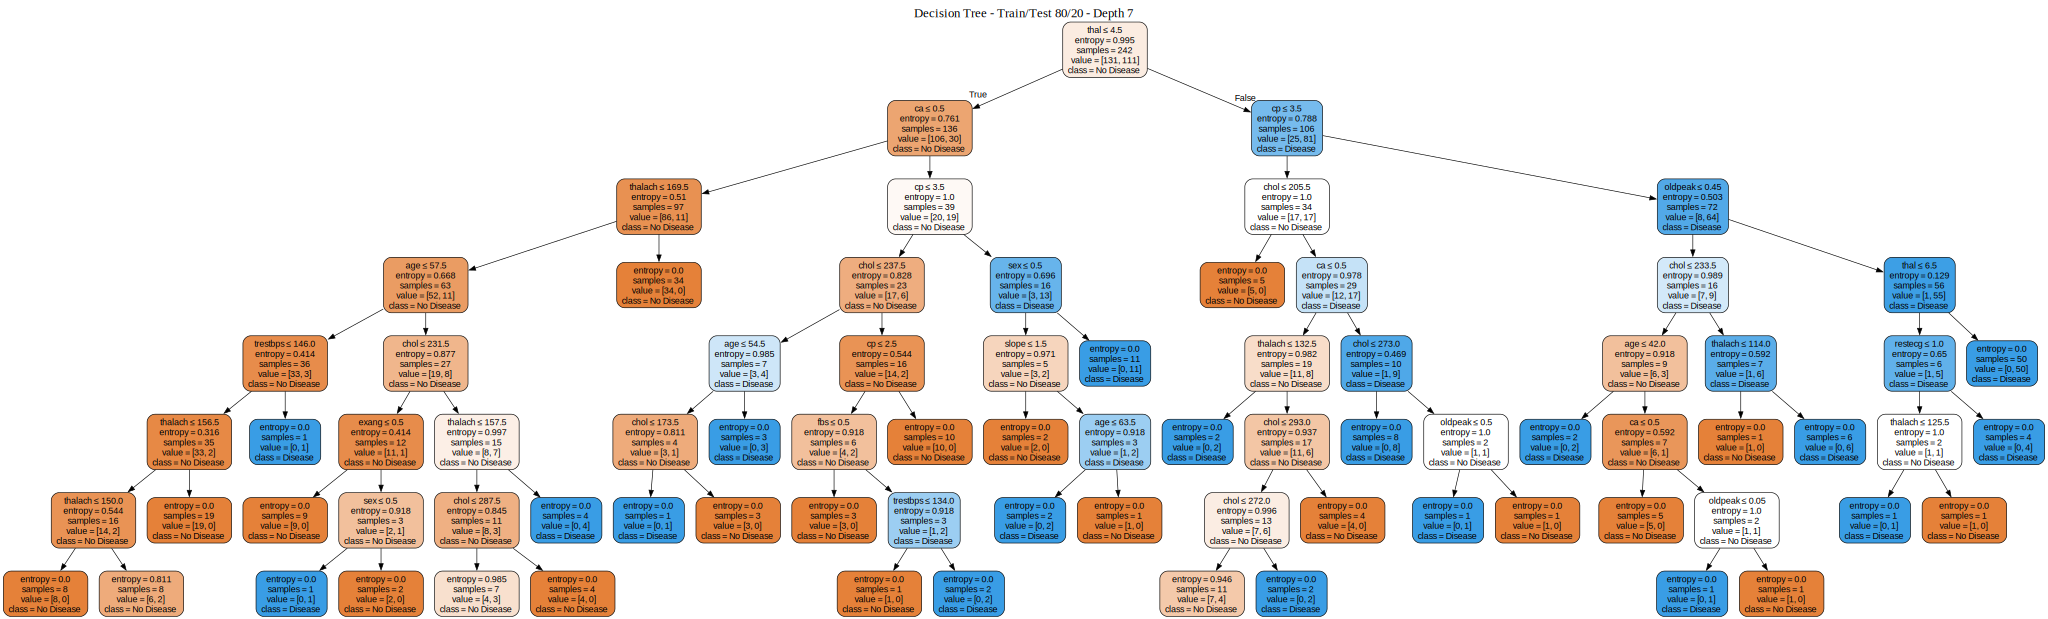

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your 80/20 dataset is already prepared:
key = "80_20"
X_train = datasets[f"feature_train_{key}"]
y_train = datasets[f"label_train_{key}"]
X_test = datasets[f"feature_test_{key}"]
y_test = datasets[f"label_test_{key}"]

# Depths to try
depths = [None, 2, 3, 4, 5, 6, 7]

# Store results
accuracy_results = {}

for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(max_depth=depth, criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    depth_label = str(depth)
    accuracy_results[depth_label] = acc
    
    dot_data = export_graphviz(
        clf,  
        feature_names=X_train.columns, 
        class_names=["No Disease", "Disease"], 
        filled=True, 
        rounded=True,
        special_characters=True,
        out_file=None,
    )
    
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Train/Test 80/20 - Depth {depth}";\nlabelloc=top;\nfontsize=20;'
    )    
    
    graph = graphviz.Source(dot_data)
    display(graph)

## **5.2. Depth and accuracy**

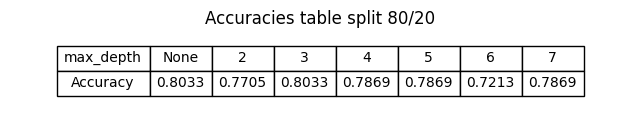

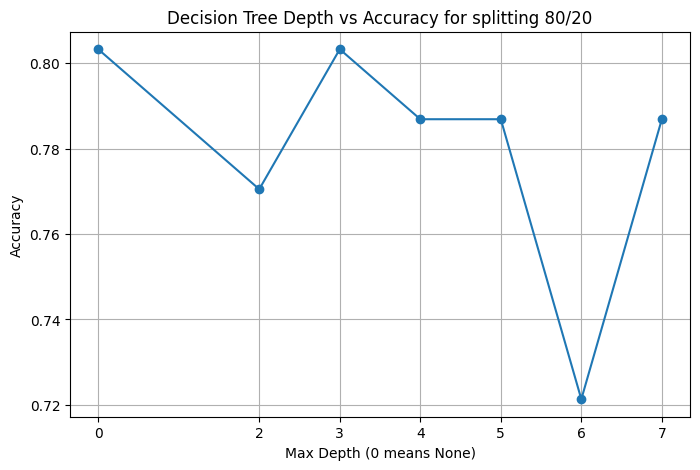

In [10]:
# Prepare data for the table
depth_labels = list(accuracy_results.keys())
accuracies = [f"{acc:.4f}" for acc in accuracy_results.values()]

# Create the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 1))
ax.axis('off')

table_data = [
    ["max_depth"] + depth_labels,
    ["Accuracy"] + accuracies
]

table = ax.table(
    cellText=table_data,
    loc='center',
    cellLoc='center',
    colWidths=[0.15] + [0.1] * len(depth_labels)
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Save the table as a PNG file
plt.title(f'Accuracies table split 80/20')
plt.savefig(f'accuracy_table_split_80_20.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot depth vs accuracy
plt.figure(figsize=(8, 5))
depth_labels = list(accuracy_results.keys())
acc_values = list(accuracy_results.values())

# For x-axis, handle 'None' separately
x_labels = [0 if d == "None" else int(d) for d in depth_labels]
plt.plot(x_labels, acc_values, marker='o')
plt.xticks(x_labels)
plt.xlabel('Max Depth (0 means None)')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy for splitting 80/20')
plt.grid(True)
plt.show()
